# Okavango_Scenario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


# Set Path

In [2]:
wd_scn = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_bau_new"
wd_base = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base_new"
wd_rd = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_rd_new"
# os.chdir(wd)



# Waterbalance Pie

In [3]:
from swatmf_pkgs import swatmf_viz

In [4]:
bau_df = swatmf_viz.read_output_sub(wd_scn)
bau_63 = bau_df.loc[bau_df['subs'] == 63]
bau_63 = bau_63[bau_63["mons"] < 13]
bau_63.index = pd.date_range('1/1/2003', periods=len(bau_63.gwq), freq="M")
abau_63 = bau_63.resample('A').sum().mean()

In [5]:
rd_df = swatmf_viz.read_output_sub(wd_rd)
rd_63 = rd_df.loc[rd_df['subs'] == 63]
rd_63 = rd_63[rd_63["mons"] < 13]
rd_63.index = pd.date_range('1/1/2003', periods=len(rd_63.gwq), freq="M")
ard_63 = rd_63.resample('A').sum().mean()

In [6]:
base_df = swatmf_viz.read_output_sub(wd_base)
base_63 = base_df.loc[base_df['subs'] == 63]
base_63 = base_63[base_63["mons"] < 13]
base_63.index = pd.date_range('1/1/2003', periods=len(base_63.gwq), freq="M")
abase_63 = base_63.resample('A').sum().mean()


In [14]:
# ard_63 = ard_63.reindex(index=['GWSWQ_f', 'Lateral Flow','Runoff','SWGWQ_f'])

In [15]:
ard_63

subs       756.000000
mons        78.000000
precip     996.465529
sw        1030.717824
latq         5.259059
surq        11.649647
et         532.644294
perco      451.604824
gwq        250.624824
dtype: float64

In [16]:
abau_63

subs       756.000000
mons        78.000000
precip     996.465529
sw        1230.284059
latq         5.659471
surq         2.289118
et         627.594588
perco      475.932529
gwq        250.745529
dtype: float64

In [17]:
abase_63

subs       756.000000
mons        78.000000
precip     996.465529
sw        1030.717824
latq         5.259059
surq        11.649647
et         532.644294
perco      451.604824
gwq        250.624529
dtype: float64

In [18]:
abau_63.index[3:]

Index(['sw', 'latq', 'surq', 'et', 'perco', 'gwq'], dtype='object')

In [ ]:
abau_63 = abau_63.reindex(index=['GWSWQ_f', 'Lateral Flow','Runoff','SWGWQ_f'])

In [38]:
explode = (0, 0.8,0.5,0.2,0.2,0.2)

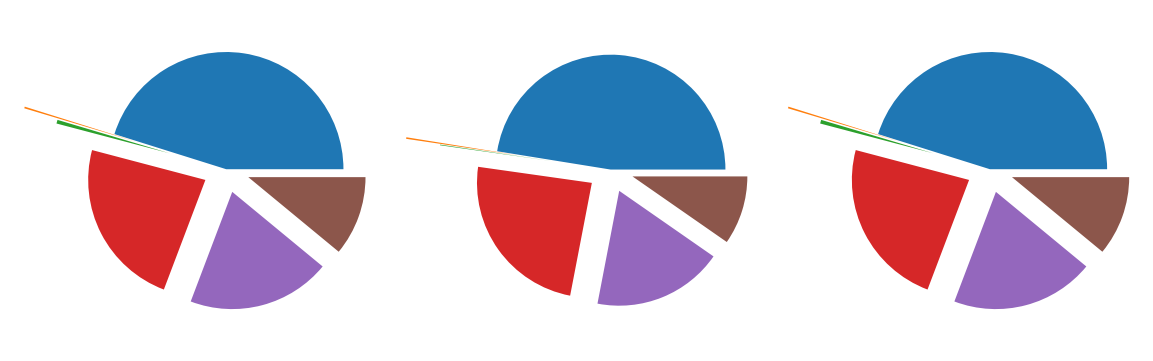

In [39]:
fig, axes = plt.subplots(1,3, figsize=(16,5))
ax1 = fig.add_subplot(111, frameon=False)
ax1.axis('off')
axes[0].pie(
    abase_63[3:], explode=explode,
    labels=abase_63.name,
    # autopct='%1.1f%%',
    shadow=False, startangle=0, textprops={'fontsize': 14, 'color': 'k'}, )
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# axes[0].legend()
axes[1].pie(
    abau_63[3:], explode=explode,
    # labels=abau_63.index[3:],
    # autopct='%1.1f%%',
    shadow=False, startangle=0, textprops={'fontsize': 14, 'color': 'k'}, )
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# axes[0].legend()

axes[2].pie(
    ard_63[3:], explode=explode,
    # labels=ard_63[3:].name,
    # autopct='%1.1f%%',
    shadow=False, startangle=0, textprops={'fontsize': 14, 'color': 'k'}, )
axes[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# axes[1].legend()
# lines, labels = fig.axes[1].get_legend_handles_labels()

# labels = ['SW', 'LATQ', 'SURQ', 'ET', 'PERCO', 'GWQ']
# ax1.legend(
#     lines, labels,
#     # loc = 'lower center',
#     ncol=6,
#     bbox_to_anchor=(0.7, 0.01),
#     fontsize=12)

# titles = ['BASE', 'BAU', 'RD']
# for ax, t in zip(axes, titles):
#     ax.set_title(t, fontsize=12)

fig.tight_layout()
plt.savefig(os.path.join('okvg_scn_wb.png'), dpi=300, bbox_inches="tight")
plt.show()

In [36]:
df =  rd_63.loc[:, 'et'] - bau_63.loc[:, 'et']
df_p = df.loc[df>0]
df_p

2003-04-30     2.488
2003-05-31    14.832
2003-06-30     5.409
2003-11-30     1.796
2003-12-31     1.442
               ...  
2019-05-31    17.063
2019-06-30     6.471
2019-09-30    24.203
2019-10-31     4.398
2019-12-31     0.162
Name: et, Length: 84, dtype: float64

In [9]:
rd_63.plot()

,subs,mons,precip,sw,latq,surq,et,perco,gwq
2003-01-31,63,1,265.707,157.043,0.515,6.957,65.179,184.730,42.014
2003-02-28,63,2,156.740,162.096,0.754,0.053,46.943,103.737,50.676
2003-03-31,63,3,125.692,156.446,0.826,0.135,74.158,56.632,41.650
2003-04-30,63,4,135.708,129.048,0.761,12.652,69.721,80.151,35.445
2003-05-31,63,5,0.000,69.029,0.629,0.000,60.679,0.000,20.853
...,...,...,...,...,...,...,...,...,...
2019-08-31,63,8,0.000,28.136,0.148,0.000,20.273,0.000,4.305
2019-09-30,63,9,4.106,1.338,0.102,0.000,31.860,0.000,2.702
2019-10-31,63,10,49.676,13.379,0.092,0.005,38.067,0.000,6.033
2019-11-30,63,11,96.147,47.025,0.109,0.013,62.551,0.000,11.595


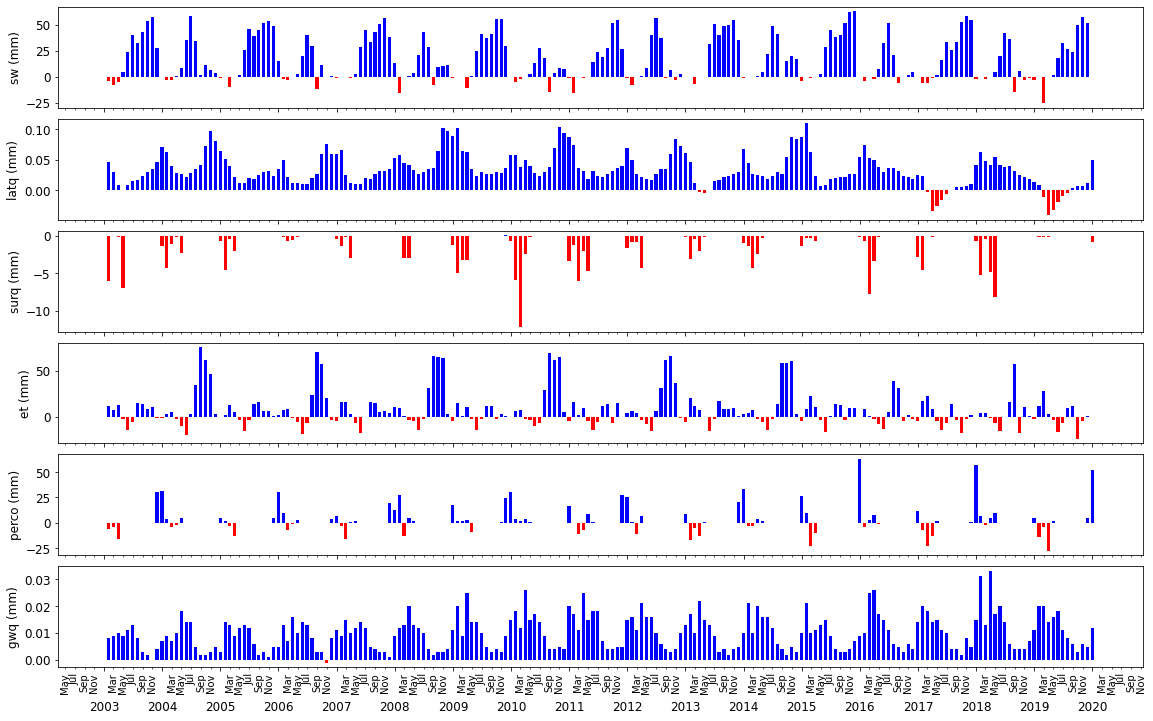

In [21]:
fig, axes = plt.subplots(6,1, figsize=(16,10), sharex=True)
for i, ax in zip(bau_63.columns[3:], axes.flat):
    df = bau_63.loc[:, i] - rd_63.loc[:, i] 
    df_p = df.loc[df>0]
    df_n = df.loc[df<=0]
    ax.bar(df_p.index, df_p, color='b', width=20)
    ax.bar(df_n.index, df_n, color='r', width=20)
    ax.set_ylabel('{} (mm)'.format(i), fontsize=12)

    # ax.plot(bau_63.index, base_63.loc[:, i])
    # ax.plot(bau_63.index, bau_63.loc[:, i])
    # ax.plot(bau_63.index, rd_63.loc[:, i])
    ax.tick_params(axis='both', labelsize=12)

years = mdates.YearLocator()
months = mdates.MonthLocator(interval=2)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('%Y')
# ax.xaxis.set_ticks_position('top')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), fontsize=10, rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.tick_params(axis='x', pad=30) # add some space for the year label

plt.savefig(os.path.join('diff_bau_rd.png'), dpi=300, bbox_inches="tight")
fig.tight_layout()
plt.show()

In [19]:
bau_63.columns[3:-1]

Index(['pet', 'et', 'sw', 'perco', 'surq'], dtype='object')

In [40]:
1050+93.35+114.30

1257.6499999999999